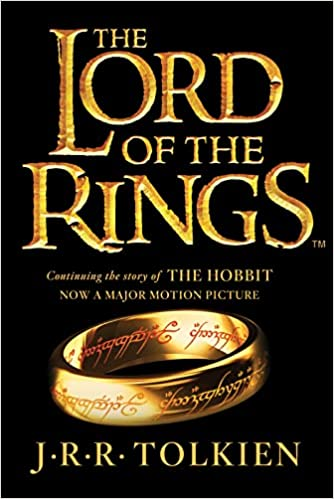

# Web Scraping - Amazon LOTR  Book

📌 In this project we want to monitor the values ​​of a book that we want to buy on amazon.

📌 To do this, we are going to make a **Web Scraper using Python** and create a table to store the value of each analyzed day

In [1]:
# import libraries

from bs4 import BeautifulSoup
import requests
import time
import datetime
import smtplib

In [22]:
# Connect to Website and pull in data

URL = 'https://www.amazon.com.br/Lord-Rings-J-R-Tolkien/dp/0544003411'

response = requests.get(URL).content


In [43]:
soup = BeautifulSoup(response, 'html.parser')

In [44]:
# Let's see the title of the html
soup.title
soup.title.text

'The Lord of the Rings | Amazon.com.br'

Exploring the html, we see that the book title has the id 'productTitle' and the price has the id 'price'.

Let's store them in variables using .find and .text to get just the text content

In [51]:
title = soup.find(id='productTitle').text
price = soup.find(id='price').text

print(title)
print(price)

 The Lord of the Rings 
R$ 120,85


The title and price have blank spaces at the beginning and end and we also want to remove the currency symbol(R$). So let´s clean up the data a little bit using slice and stripe (Remove spaces at the beginning and at the end of the string)



In [52]:
title = title.strip()
price = price.strip()[2:].strip()

print(title) 
print(price)
type(price)


The Lord of the Rings
120,85


str

In [53]:
# Create a Timestamp for your output to track when data was collected

import datetime
today = datetime.date.today()
print(today)


2022-11-18


Let's create a table and define the headers and data that will enter

In [54]:
# Create CSV and write headers and data into the file
import csv

#make a list
header = ['Title', 'Price', 'Date']
data = [title, price, today]

#only runs for the first time:
with open('PortfolioLOTRScraperDataset.csv', 'w', newline='', encoding='UTF8') as f:
 writer = csv.writer(f)
 writer.writerow(header)
 writer.writerow(data)

Let's see if our table worked:

In [56]:
import pandas as pd
df = pd.read_csv('PortfolioLOTRScraperDataset.csv')
print(df)

                   Title   Price        Date
0  The Lord of the Rings  120,85  2022-11-18


Finally, let's create a function to synthesize our code

In [ ]:
#Combine all of the above code into one function

def check_price():
URL = 'https://www.amazon.com.br/Lord-Rings-J-R-Tolkien/dp/0544003411'
response = requests.get(URL).content
soup = BeautifulSoup(response, 'html.parser')
title = soup.find(id='productTitle').text
price = soup.find(id='price').text
title = title.strip()
price = price.strip()[2:].strip()

 import datetime
 today = datetime.date.today()

 import csv
 header = ['Title', 'Price', 'Date']
 data = [title, price, today]
 # #Now we are appending data to the csv (a+) : more lines in the csv
 with open('PortfolioAmazonWebScraperDataset.csv', 'a+', newline='', encoding='UTF8') as f:
 writer = csv.writer(f)
 writer.writerow(data)

Now let's make it automatic

In [ ]:
# With the program running, runs check_price after a set time and inputs data into your CSV
# 86400s = 24 hours

while(True):
 check_price()
 time.sleep(86400)


I hope that you enjoyed 😃